In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

### 데이터 읽어오기
- \t으로 구분된 데이터

In [ ]:
chipo = pd.read_csv('data/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
# 데이터 프레임 확인
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [ ]:
# 결측치 확인
chipo.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [ ]:
# 컬럼명확인
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [ ]:
# 인덱스확인
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 요약 통계 정보
####  .describe()
- 숫자 데이터에 대한 요약 통계 정보
- 숫자 데이터 중에 범위형 데이터의 컬럼만 확인한다.
- count : 결측치를 제외한 개수
- mean : 결측치를 제외한 평균
- std : 결측치를 제외한 표준 편차
- min : 결측치를 제외한 최소값
- 25% : 결측치를 제외한 25% 위치 값
- 50% : 결측치를 제외한 50% 위치 값
- 75% : 결측치를 제외한 75% 위치 값
- max : 결측치를 제외한 최대값

In [ ]:
chipo[['order_id', 'quantity']].describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### 문자열 컬럼 요약통계 정보
- 숫자 컬럼이라고 하더라도 카테고리형 데이터라고 한다면 문자로 변환한다음
- 문자열 컬럼 요약통계 정보로 확인한다.
- count : 결측치를 제외한 데이터의 개수
- unique : 중복을 제거한 값의 종류 수
- top : 제일 많이 출현한 값
- freq : top의 값이 출현한 수

In [ ]:
chipo[['item_name', 'choice_description', 'item_price']].describe()

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


### 카테고리형 데이터의 데이터 종류

In [ ]:
chipo['item_name'].value_counts().index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa',
       'Chicken Salad Bowl', 'Canned Soda', 'Side of Chips', 'Veggie Burrito',
       'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl', 'Barbacoa Bowl',
       'Carnitas Burrito', 'Steak Soft Tacos', '6 Pack Soft Drink',
       'Chips and Tomatillo Red Chili Salsa', 'Chicken Crispy Tacos',
       'Chips and Tomatillo Green Chili Salsa', 'Carnitas Soft Tacos',
       'Steak Crispy Tacos', 'Chips and Tomatillo-Green Chili Salsa',
       'Steak Salad Bowl', 'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Izze',
       'Chips and Roasted Chili-Corn Salsa', 'Veggie Salad Bowl',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Chicken Salad',
       'Carnitas Crispy Tacos', 'Veggie Soft Tac

In [ ]:
# 컬럼내에서 중복을 제외하고 데이터를 가져온다.
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [ ]:
# 중복을 제외한 데이터의 개수
len(chipo['item_name'].unique())

50

이 식당의 메뉴는 총 50가지가 된다.

### 가장 많이 주문한 item 파악하기

In [ ]:
# 상품 이름별 몇 개씩 저장되어 있는지 값을 가져온다.
a1 = chipo['item_name'].value_counts()
# 만약 결과에서 정렬이 안되어 있다면..
# a1.sort_values(ascending=False, inplace=True)
# 처음 것을 가져온다.
print(f'가장 많이 주문한 음식 : {a1.index[0]}')

가장 많이 주문한 음식 : Chicken Bowl


### item_name 당 주문 개수와 총량을 구한다.

In [ ]:
# item 당 주문 개수를 가져온다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count.sort_values(ascending=False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [ ]:
# item 당 주문 총량을 구한다
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity.sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


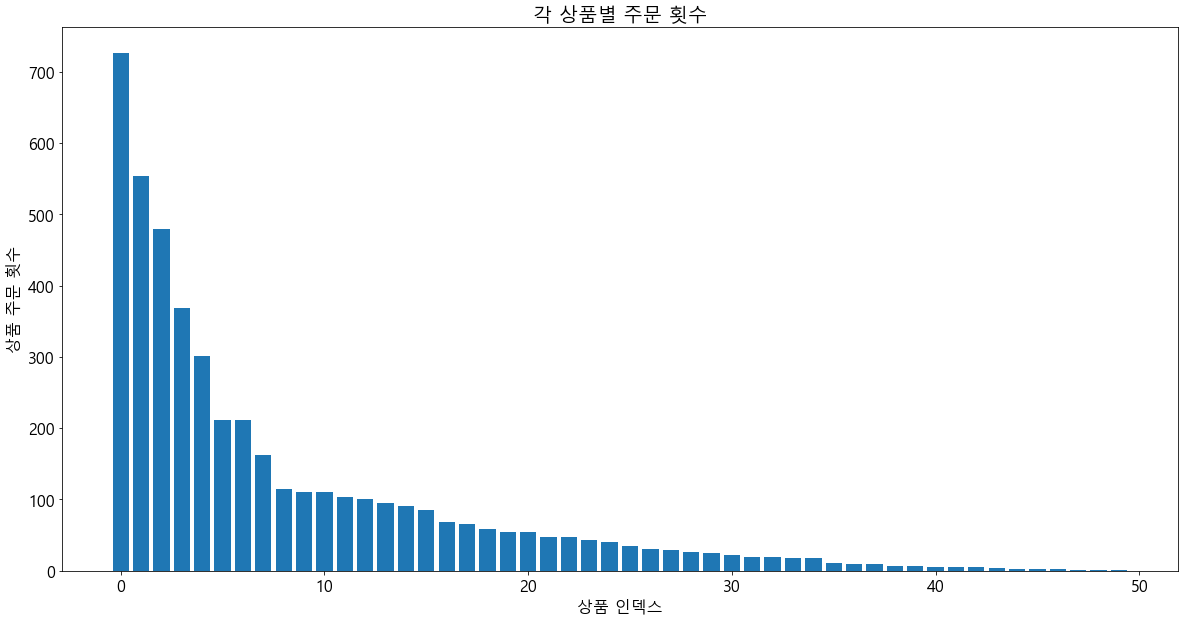

In [ ]:
# 각 상품별 주문 횟수
order_count = order_count.sort_values(ascending=False)
item_name_list = order_count.index.tolist()
# x 축 (상품의 개수만큼 값이 들어있는 range)
x = np.arange(len(item_name_list))
# x = order_count.index
# 상품별 주문 횟수
order_count2 = order_count.values.tolist()

# 시각화
plt.bar(x, order_count2, align='center')
plt.ylabel('상품 주문 횟수')
plt.xlabel('상품 인덱스')
plt.title('각 상품별 주문 횟수')
plt.show()

In [ ]:
order_count.head(10)

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: order_id, dtype: int64

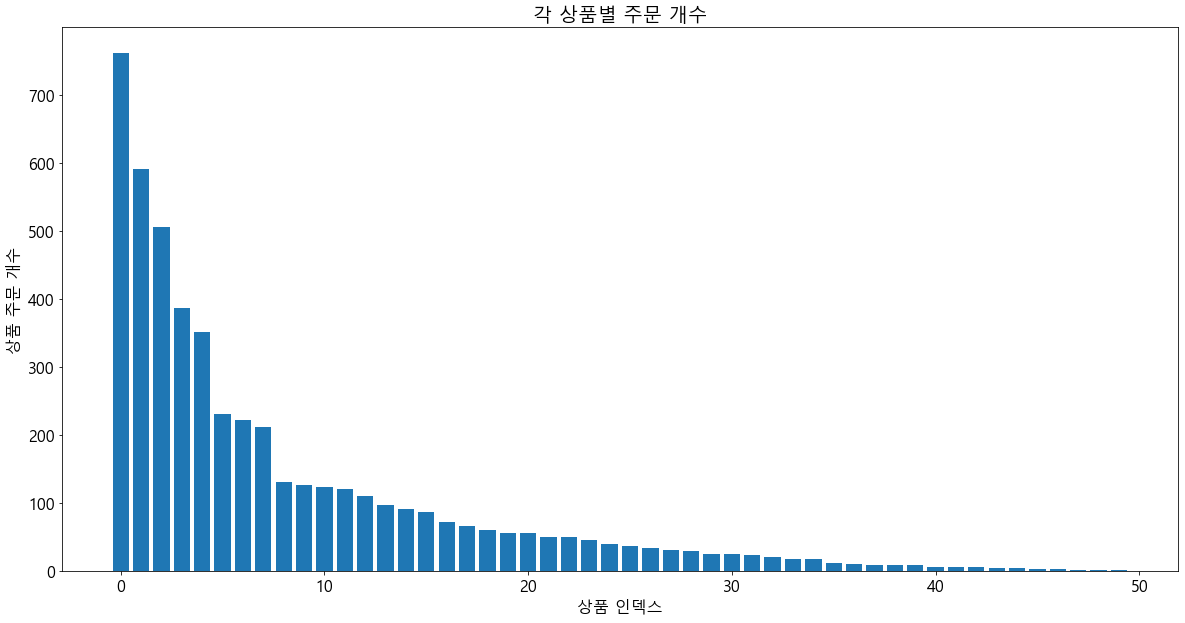

In [ ]:
# 주문 상품 총 개수
# 값을 기준으로 내림차순 정렬을 한다.
item_quantity.sort_values(ascending=False, inplace=True)

# 상품 이름 목록을 가져온다.
item_name_list = item_quantity.index.tolist()

# X 축(상품의개수만큼 값이 들어있는 range)
x_pos = np.arange(len(item_name_list))

# 상품별 주문 개수
item_cnt = item_quantity.values.tolist()

# 시각화
plt.bar(x_pos, item_cnt, align='center')
plt.ylabel('상품 주문 개수')
plt.xlabel('상품 인덱스')
plt.title('각 상품별 주문 개수')
plt.show()

In [ ]:
item_quantity.head(10)

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

In [ ]:
df1 = pd.DataFrame({
    '주문횟수 top10 상품명' : order_count.head(10).index,
    '주문횟수' : order_count.head(10).values,
    '주문개수 top10 상품명' : item_quantity.head(10).index,
    '주문개수' : item_quantity.head(10).values
})

df1

,주문횟수 top10 상품명,주문횟수,주문개수 top10 상품명,주문개수
0,Chicken Bowl,726,Chicken Bowl,761
1,Chicken Burrito,553,Chicken Burrito,591
2,Chips and Guacamole,479,Chips and Guacamole,506
3,Steak Burrito,368,Steak Burrito,386
4,Canned Soft Drink,301,Canned Soft Drink,351
5,Steak Bowl,211,Chips,230
6,Chips,211,Steak Bowl,221
7,Bottled Water,162,Bottled Water,211
8,Chicken Soft Tacos,115,Chips and Fresh Tomato Salsa,130
9,Chicken Salad Bowl,110,Canned Soda,126


### apply와 lambda 함수를 이용한 데이터 전처리

#### lambda와 같이 쓰는 연산
- transform()= 각 원소를 살리고 그 안에 연산결과를 채운다.(평균값이 같으면 그대로 각각 같은값이 모든 행에 표시)
- apply()= 그룹별로 행당 한줄의 정리된 값으로 정리되어 출력.

- 컬럼 단위 데이터에 apply 함수를 통해 전처리를 한다.
- lambda : 먼저 lambada x 에서 x 에 데이터가 들어오게 된다.
- 그 후 콜론(:) 뒤에 있는 식을 수행하여 그 결과를 반환한다.
- apply : lambda 식으로 수행된 결과를 하니씩 쌓아서 Series로 반환한다.
- lambda 식은 주어진 데이터의 수 만큼 반복한다.

In [ ]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [ ]:
chipo['item_price']

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [ ]:
chipo['item_price'].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

### 문제
- 주문당 평균 계산 금액 출력
- 한 주문에 10달러 이상 사용한 주문의 id를 출력한다.
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지..
- Veggie Salad Bowl'이 몇번 주문 되었는지.
- 'Chiken Bowl'을 2개 이상 주문한 주문 횟수 구하기

### 주문당 평균 계산 금액 출력

In [ ]:
# 데이터 프레임 확인
# order_id가 주문번호
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [ ]:
# 추가 주문 내역이 없는 것을 가져온다.
a1 = chipo['choice_description'].isna()
a2 = chipo[a1]

# quantity가 두 개인 것을 가져온다.
a3 = a2.query('quantity == 2 and item_name == "Chips"')
display(a3)

# quantity가 한 개인 것을 가져온다.
a4 = a2.query('quantity == 1 and item_name == "Chips"')
display(a4)

,order_id,quantity,item_name,choice_description,item_price
223,98,2,Chips,NaN,4.3
828,343,2,Chips,NaN,4.3
1301,530,2,Chips,NaN,4.3
1600,648,2,Chips,NaN,4.3
1605,649,2,Chips,NaN,4.3
1850,750,2,Chips,NaN,4.3
1900,766,2,Chips,NaN,4.3
2112,850,2,Chips,NaN,4.3
2258,909,2,Chips,NaN,4.3
2343,934,2,Chips,NaN,4.3


,order_id,quantity,item_name,choice_description,item_price
40,19,1,Chips,NaN,2.15
59,27,1,Chips,NaN,2.15
77,34,1,Chips,NaN,2.15
80,35,1,Chips,NaN,2.15
208,92,1,Chips,NaN,2.15
...,...,...,...,...,...
4505,1791,1,Chips,NaN,2.15
4509,1793,1,Chips,NaN,1.99
4525,1799,1,Chips,NaN,2.15
4584,1823,1,Chips,NaN,2.15


item_price 는 상품에 대한 단가가 아니라 해당 주문에 대한 총 금액임을 알 수 있다.

item_price는 단가에 quantity를 곱한 값이된다. 이에 order_id 를 기준으로 그룹을 묶고 평균을 구하면 된다. 만약 item_price가 단가였다면 item_price와 quantity를 곱한 결과를 가진 컬럼을 추가한다음에 그 컬럼의 평균을 구해야 한다.

In [ ]:
# 주문당 평균을 구한다.
chipo.groupby('order_id')['item_price'].mean()

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

In [ ]:
# 주문당 총합을 구한다.
chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [ ]:
# 주문당 주문건을 구한다.
chipo.groupby('order_id')['item_price'].count()

order_id
1       4
2       1
3       2
4       2
5       2
       ..
1830    2
1831    3
1832    2
1833    2
1834    3
Name: item_price, Length: 1834, dtype: int64

### 한 주문에서 20달러 이상 사용한 주문의 id를 가져온다.

In [ ]:
# 각 주문별 총 주문 금액을 가져온다.
a1 = chipo.groupby('order_id')['item_price'].sum()
a1

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [ ]:
# 주문 총 금액이 20달러 이상인 것은 True, 아닌 것인 False은 데이터를 가져온다.
a2 = a1 >= 20
a2

order_id
1       False
2       False
3       False
4        True
5       False
        ...  
1830     True
1831    False
1832    False
1833     True
1834     True
Name: item_price, Length: 1834, dtype: bool

In [ ]:
# 조건에 해당하는 주문의 id를 가져온다.
a3 = a1[a2]
a3.index

Int64Index([   4,   18,   20,   21,   26,   28,   30,   34,   40,   43,
            ...
            1811, 1812, 1822, 1824, 1825, 1827, 1829, 1830, 1833, 1834],
           dtype='int64', name='order_id', length=589)

### 각 상품별 가격 구하기

In [ ]:
# 상품 종류 개수를 가져온다.
a1 = chipo['item_name'].value_counts()
len(a1)

50

In [ ]:
# 한개만 팔린 상품들의 종류 개수를 가져온다.
a1 = chipo.query('quantity == 1')
a2 = a1['item_name'].value_counts()
len(a2)

50

하나만 팔린 목록에 모든 상품이 존재한다.

In [ ]:
# 1개만 팔린 상품들의 목록을 가져온다.
chipo_one_item = chipo.query('quantity == 1')
chipo_one_item

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [ ]:
# 특정 상품의 가격이 한가지만 있는지 확인한다..
a1 = chipo_one_item.query('item_name == "Chips and Fresh Tomato Salsa"')
a2 = a1['item_price']
a2.value_counts()

2.95    66
2.39    36
2.29     3
Name: item_price, dtype: int64

상품의 가격이 변할 수 있다.

In [ ]:
# 모든 주문건수에 대한 상품 하나의 가격을 구한다.
chipo['item_price2'] = chipo['item_price'] / chipo['quantity']
chipo

,order_id,quantity,item_name,choice_description,item_price,item_price2
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [ ]:
# 하나의 상품에 대해 여러가지 값이 존재하므로 최소값으로 결정한다.
# 각 상품별 최소값을 구한다.
a1 = chipo.groupby('item_name')['item_price2'].min()
a1

item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

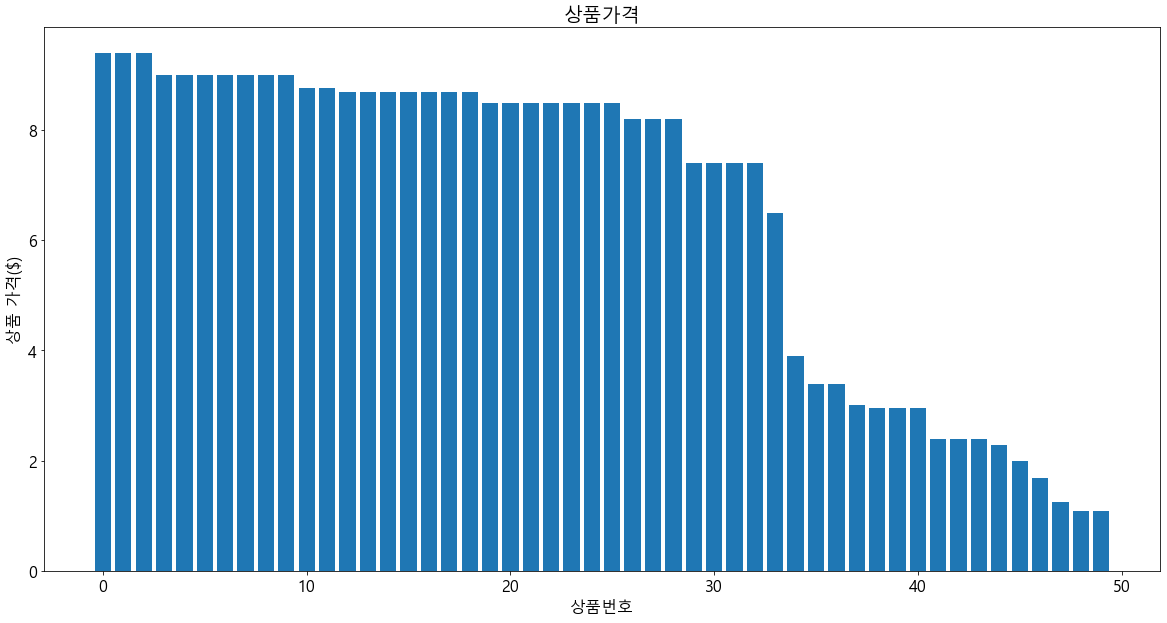

In [ ]:
# 시각화
a1.sort_values(inplace=True, ascending=False)

# 상품의 이름의 수 만큼 들어있는 리스트를 생성한다.
x_pos = np.arange(len(a1))

# 가격
y_pos = a1.values

plt.bar(x_pos, y_pos, align='center')
plt.ylabel('상품 가격($)')
plt.xlabel('상품번호')
plt.title('상품가격')
plt.show()

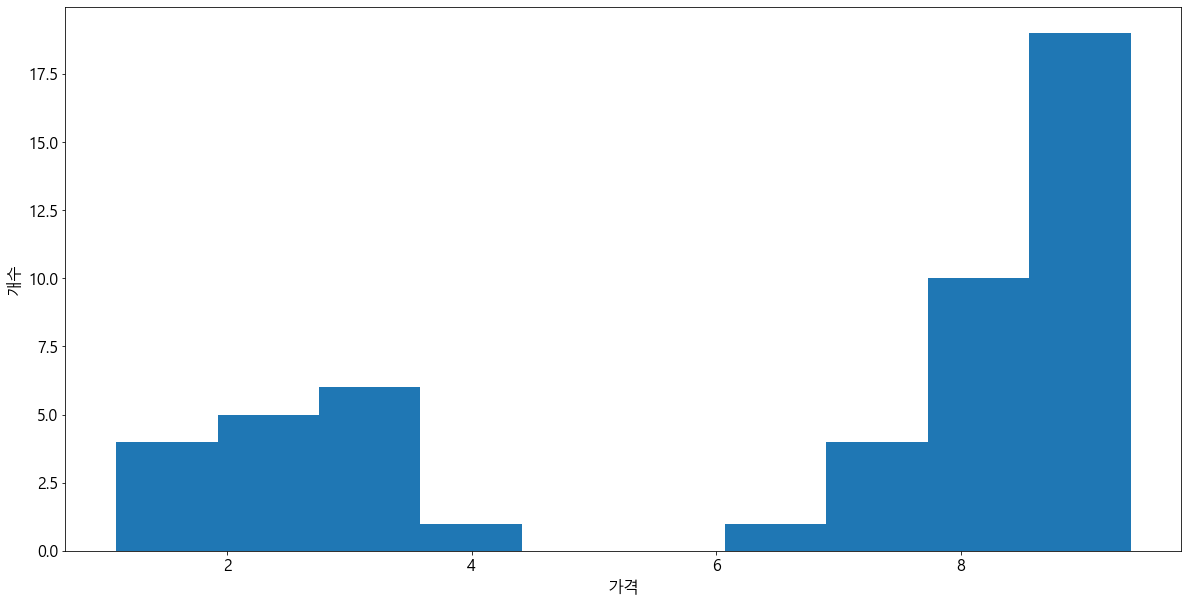

In [ ]:
# 상품 가격 히스토그램
plt.hist(a1)
plt.ylabel('개수')
plt.xlabel('가격')
plt.show()